# ANALYSIS OF EARTHQUAKES IN TURKEY BETWEEN 01.2017 - 12.2022

First of all, we mentioned earlier that due to the size of the data (100s of gigabytes), we cannot access the data for the entire Turkey region. However, we found a way to get all the data in very small sizes, in detail, the earthquake magnitude is filtered which are biger than 3.0 and downloaded in .txt format. Therefore, we have decided to analyze all Turkey data because of we have chance.

We get the data from [B.Ü. KRDAE Bölgesel Deprem-Tsunami İzleme ve Değerlendirme Merkezi](http://www.koeri.boun.edu.tr/sismo/zeqdb/)

Let's start with importing libraries.

In [1]:
import urllib.request
import io
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import seaborn as sns
from urllib.parse import urlencode
from collections import Counter
from zipfile import ZipFile
from xmltodict import parse
from mpl_toolkits.basemap import Basemap

In [2]:
earthquake = pd.read_csv('./data/20170101_20221231_3_9.0_26_993.txt', delimiter = "\t", encoding='mbcs', header=0,
                         names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
earthquake.sort_values(by='Date').reset_index(drop=True)

,ID,Code,Date,Time,Latitude,Longtitude,Depth(KM),xM,MD,ML,Mw,Ms,Mb,Type,Location
0,7555,20170101054317,2017.01.01,05:43:17.77,35.4185,31.4062,75.9,3.3,0.0,3.1,3.3,0.0,0.0,Ke,AKDENIZ
1,7554,20170101061206,2017.01.01,06:12:06.46,38.7173,38.1057,5.0,3.2,0.0,3.1,3.2,0.0,0.0,Ke,YESILPINAR-HEKIMHAN (MALATYA) [South West 0.4...
2,7553,20170101064708,2017.01.01,06:47:08.06,36.3650,27.8032,71.9,3.2,0.0,3.0,3.2,0.0,0.0,Ke,AKDENIZ
3,7550,20170102143038,2017.01.02,14:30:38.18,39.5347,26.1647,5.6,3.1,0.0,3.1,3.1,0.0,0.0,Ke,YUKARIKOY-AYVACIK (CANAKKALE) [South West 2.4...
4,7552,20170102015056,2017.01.02,01:50:56.73,39.5415,26.1348,5.6,3.7,0.0,3.6,3.7,0.0,0.0,Ke,GULPINAR-AYVACIK (CANAKKALE) [North East 1.7 km]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7550,5,20221128230430,2022.11.28,23:04:30.60,38.4673,39.2230,3.8,3.1,0.0,3.1,3.0,0.0,0.0,Ke,ALINCIK-SIVRICE (ELAZIG) [North West 1.1 km]
7551,4,20221129024529,2022.11.29,02:45:29.07,37.5505,42.4755,5.0,3.2,0.0,3.2,3.1,0.0,0.0,Ke,SIRNAK (SIRNAK) [North East 4.0 km]
7552,3,20221129042222,2022.11.29,04:22:22.36,37.0692,28.3987,5.5,3.7,0.0,3.6,3.7,0.0,0.0,Ke,YESILOVA-ULA (MUGLA) [West 2.3 km]
7553,2,20221129212932,2022.11.29,21:29:32.64,37.0638,30.5472,7.2,3.4,0.0,3.4,3.4,0.0,0.0,Ke,YAGCA-DOSEMEALTI (ANTALYA) [West 1.4 km]


In [3]:
names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"]

What do the terms in the data mean?

What is xM(magnitude)?

-It occurs as a result of the breaking of the fault line at a certain depth under the influence of the tension of the earth's crust. The magnitude of the earthquake is a measure of the size of the ruptured surface and the energy released. For example, an earthquake with a magnitude of M=2.0 indicates that a fracture of about the size of a football field has occurred in the depths of the ground.

How is the magnitude of an earthquake measured?

-The fracture that creates the earthquake is usually deep in the earth's crust, but in large earthquakes, it reaches up to the earth and surface fractures called fault line fractures occur. Although we do not see the earthquake fracture itself, an idea of its size can be obtained by examining the effects it produces. Devices called seismometers are used to measure the fluctuations in the earth's crust. Whichever method is used, it is essential that the center of the earthquake is correctly determined when calculating the magnitude. Earthquake-induced crustal fluctuations can undergo very different changes depending on the direction in which they spread. Considering these possible disturbances, the results of a single seismometer are often not sufficient to determine the magnitude. A safer result is obtained by taking the average of many seismometer measurements that can monitor the earthquake from different directions and from different distances.

Why are there multiple Earthquake Magnitude definitions?

-While measuring the magnitude of the earthquake, a certain method is valid for earthquakes within a certain magnitude range and a certain distance, while for larger or more distant earthquakes, different methods should be used. If these different methods are applied to the same earthquake, there is also the possibility of obtaining different values. The safest and most accurate is the result of the method that is most suitable for that size and distance.

How many methods are there for earthquake magnitude? What are these?

<b>-Time dependent size (Md)</b>:
It is based on the principle that a larger earthquake will cause oscillations on the seismometer for a longer period of time. How long the earthquake creates a vibration on the seismometer is measured and scaled with the distance from the earthquake center. This method is used for small (M<5.0) and near (Distance<300 km) earthquakes.

<b>-Local Size(MI)</b>:
This method is the first method proposed by Richter in 1935 to measure earthquakes. This method is also used for relatively small (less than 6.0 magnitude) and close (less than 700 km distance) earthquakes.

<b>-Surface Wave Size(Ms)</b>:
This method has been developed to measure large earthquakes (M>6.0) where the first two methods are insufficient. Such waves can propagate to great distances from the source on earth. Contrary to other methods, the reliability of this method increases even more in long distance measurements.

<b>*Body Wave Size(Mb)</b>: (bak)
This method is similar to the Surface Wave method, except that waves propagating at depths are used instead of waves propagating from the surface.
Not only the sound wave, but also another type of wave called shear wave is produced in the earth's crust. All of these two types of waves are called Body Waves.

<b>-Moment Magnitude(Mw)</b>:
This size type is the most reliable compared to the others. It is far more complicated to determine than any of them. It essentially corresponds to making a mathematical model of the occurrence of the earthquake. In practice, Moment Magnitude can be calculated only for earthquakes above a certain magnitude (M>4.0).

In [4]:
for i in range(6):
    earthquake[names[i+6]] = earthquake[names[i+6]].astype(float)
earthquake['Code'] = earthquake['Code'].astype(str)
earthquake['ID'] = earthquake['ID'].astype(str)

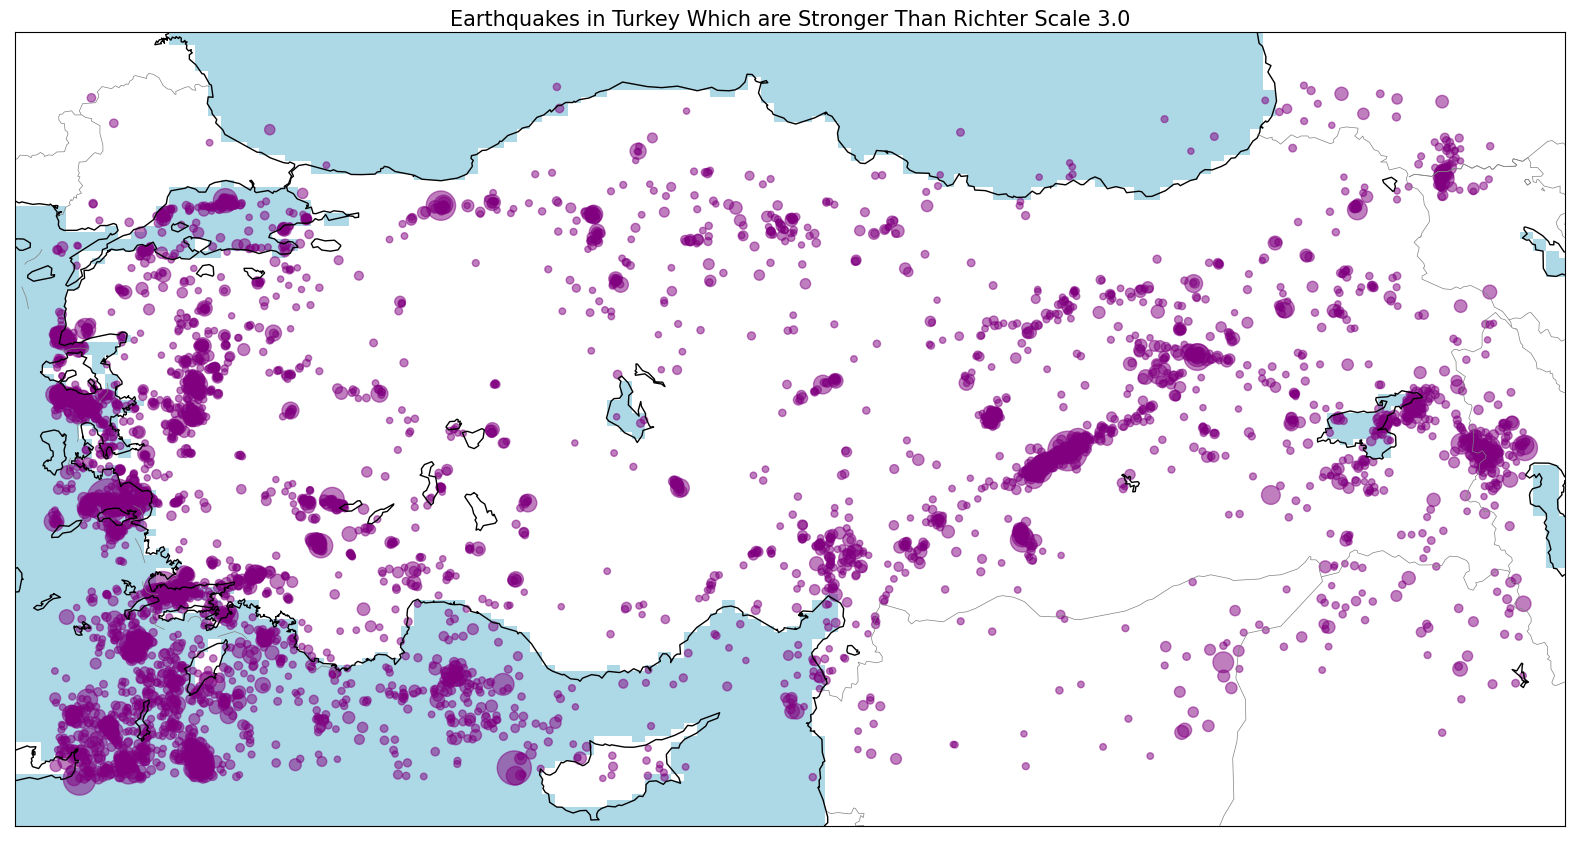

In [5]:
plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=34.5,
           urcrnrlat=42.5,
           llcrnrlon=25.5,
           urcrnrlon=45.5,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='white', ocean_color='lightblue')

xs,ys = m(earthquake['Longtitude'], earthquake['Latitude'])
ss = np.exp(earthquake['xM'])
m.scatter(xs, ys, c='purple', s=ss, alpha=0.5)

plt.title("Earthquakes in Turkey Which are Stronger Than Richter Scale 3.0", fontdict={"fontsize": 15}, pad=5);

The map above shows the locations and magnitudes (correlated with the diameters of the purple circles) of earthquakes that occurred in Turkey between the years 2017-2022.

Now we can see the relationship between the depth and the magnitude of the earthquake thanks to the following scatterplot:

Text(0, 0.5, 'xM')

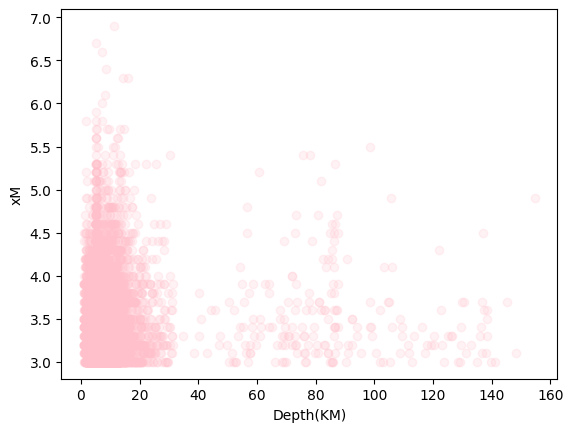

In [6]:
x='Depth(KM)'
y='xM'
plt.scatter(earthquake[x],earthquake[y], c='pink', alpha=0.2)
plt.xlabel(x)
plt.ylabel(y)

We can only see that the earthquakes are hapening close to surface oftenly.

Text(0.5, 0, 'xM')

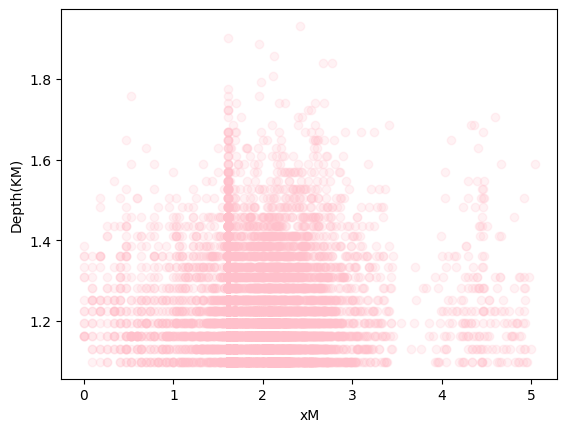

In [7]:
plt.scatter(np.log(earthquake[x]), np.log(earthquake[y]), c='pink', alpha=0.2)
plt.ylabel(x)
plt.xlabel(y)

We are also looking for a logarithmic relationship, but we can't see any relationship between them. (The reason we're looking for a logarithmic relationship is when working on long-term graphs like 5 or 10 years, the logarithmic scale is preferred.)
If you are looking for detailed information, you can reach from [here](https://piyasarehberi.org/yatirim/teknik-analiz/202-lineer-ve-logaritmik-grafik-kullanimi-ve-farklari).

As a result of this scatterplot created, it is possible to say that there is no relationship between depth (KM) and magnitude (xM).

In [8]:
corr=earthquake.corr(numeric_only=True)
corr=corr.dropna(axis=0,how='all')
corr=corr.dropna(axis=1,how='all')
corr

,Latitude,Longtitude,Depth(KM),xM,ML,Mw
Latitude,1.000000,0.307183,-0.203318,-0.029993,-0.008815,0.053426
Longtitude,0.307183,1.000000,-0.131445,0.057765,0.034811,0.092110
Depth(KM),-0.203318,-0.131445,1.000000,0.029274,0.043019,-0.034877
xM,-0.029993,0.057765,0.029274,1.000000,0.976363,0.490057
ML,-0.008815,0.034811,0.043019,0.976363,1.000000,0.441976
Mw,0.053426,0.092110,-0.034877,0.490057,0.441976,1.000000


When there is no variation, correlation number will be NaN due to its formula <b>cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]</b>. That is why we dropped Nan values from the correlation table. (The correlation coefficient is a coefficient that shows the relationship between dependent and independent variables. The correlation coefficient gives us information about the direction of the variables and how the interactions are. The correlation coefficient is the measure of the linear relationship between two variables and is independent of the units of the variables studied and is between -1 ≤ r ≤1. Correlation coefficient approaching 0 indicates the existence of a weak relationship between the variables. If the variables increase or decrease together, there is a positive relationship, if one variable increases while the other decreases, there is a negative relationship.)
According to the information provided and the calculations made, we show that there is a weak relationship between the variables, since the number of NaN is very close to 0.

If you are looking for detailed information, you can reach from [here](https://www.veribilimiokulu.com/korelasyon-analizir-nedir/).

In [9]:
def date_filter(earthquake,date):
    same_day=earthquake.groupby(date).mean(numeric_only=True).reset_index()
    same_day=same_day.set_index(same_day[date])
    dups_col=earthquake.pivot_table(index = [date], aggfunc ='size')
    dups_col=pd.DataFrame(dups_col)
    dups_col=dups_col.sort_values(date)
    dups_col.columns=['Duplicates']
    day_earthquake=pd.concat([same_day,dups_col],axis=1,ignore_index=False, sort=False)
    day_earthquake=day_earthquake.reset_index(drop=True)
    day_earthquake=day_earthquake.rename_axis('Index')
    return day_earthquake

The function above calculates how many earthquakes occurred in the same day:

In [10]:
daily_earthquake=date_filter(earthquake,'Date')
daily_earthquake

,Date,Latitude,Longtitude,Depth(KM),xM,MD,ML,Mw,Ms,Mb,Duplicates
Index,,,,,,,,,,,
0,2017.01.01,36.833600,32.438367,50.933333,3.233333,0.0,3.066667,3.233333,0.0,0.0,3
1,2017.01.02,38.223800,27.823167,30.833333,3.500000,0.0,3.466667,3.500000,0.0,0.0,3
2,2017.01.04,35.746650,27.915750,19.050000,3.700000,0.0,3.500000,3.700000,0.0,0.0,4
3,2017.01.05,36.509000,26.801500,122.000000,4.300000,0.0,4.300000,4.100000,0.0,0.0,1
4,2017.01.06,38.813800,30.478825,6.050000,3.287500,0.0,3.150000,2.875000,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...
1854,2022.11.26,36.853250,27.474450,46.200000,3.850000,0.0,3.850000,3.700000,0.0,0.0,2
1855,2022.11.27,37.190833,28.408967,12.566667,3.733333,0.0,3.600000,2.233333,0.0,0.0,3
1856,2022.11.28,38.467300,39.223000,3.800000,3.100000,0.0,3.100000,3.000000,0.0,0.0,1


Text(0.5, 1.0, 'Daily Earthquake Numbers in Turkey Between January 2017 - December 2022')

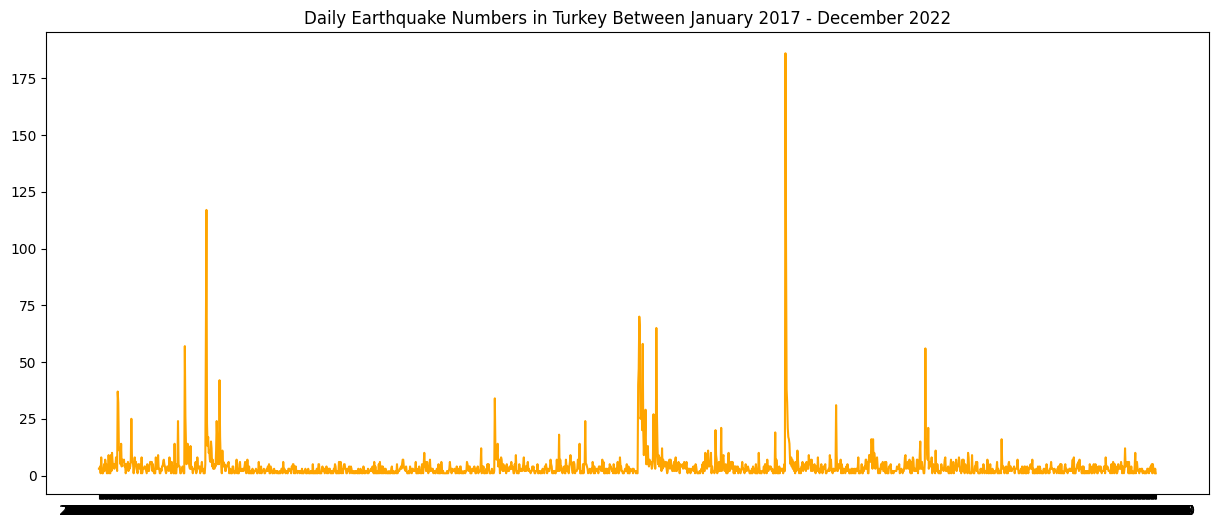

In [11]:
plt.figure(figsize=(15,6))
#plt.xticks('Index')
plt.plot(daily_earthquake.iloc[:,0],daily_earthquake.iloc[:,len(daily_earthquake.transpose())-1],color='orange')
plt.title("Daily Earthquake Numbers in Turkey Between January 2017 - December 2022")

This is the graph of the number of earthquakes in same day from 2017 until now.

<BarContainer object of 95 artists>

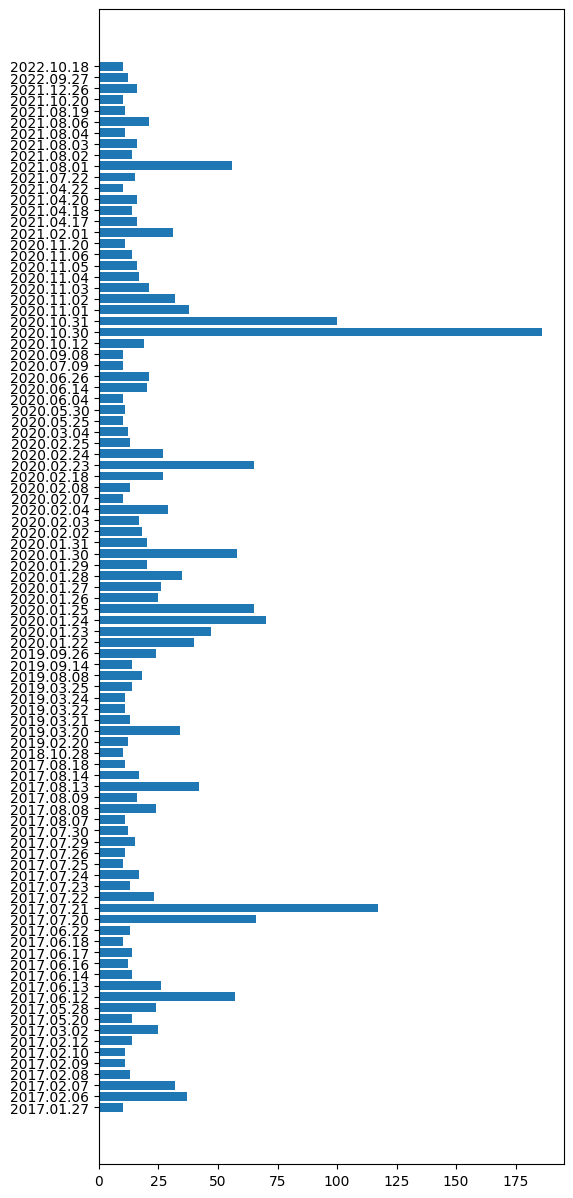

In [12]:
daily_10=daily_earthquake[(daily_earthquake['Duplicates']>=10)]
plt.figure(figsize=(6,15))
plt.xticks(rotation='horizontal')
plt.barh(daily_10.iloc[:,0],daily_10.iloc[:,10])

We can filter the data by the number of occurrences of earthquakes and see the significant days with at least 10 earthquakes.

In [13]:
daily_15=daily_earthquake[(daily_earthquake['Duplicates']>=15)]
dup_locs=pd.DataFrame([])
loc_dif=pd.DataFrame([])
for i in range(len(daily_15)):
    dates=daily_15['Date']
    dup_locs=pd.concat([dup_locs,earthquake[(earthquake['Date']==dates.iloc[i])]])
    daily_loc=pd.DataFrame(dup_locs.var(numeric_only=True)).transpose()
    loc_dif=pd.concat([loc_dif,daily_loc])

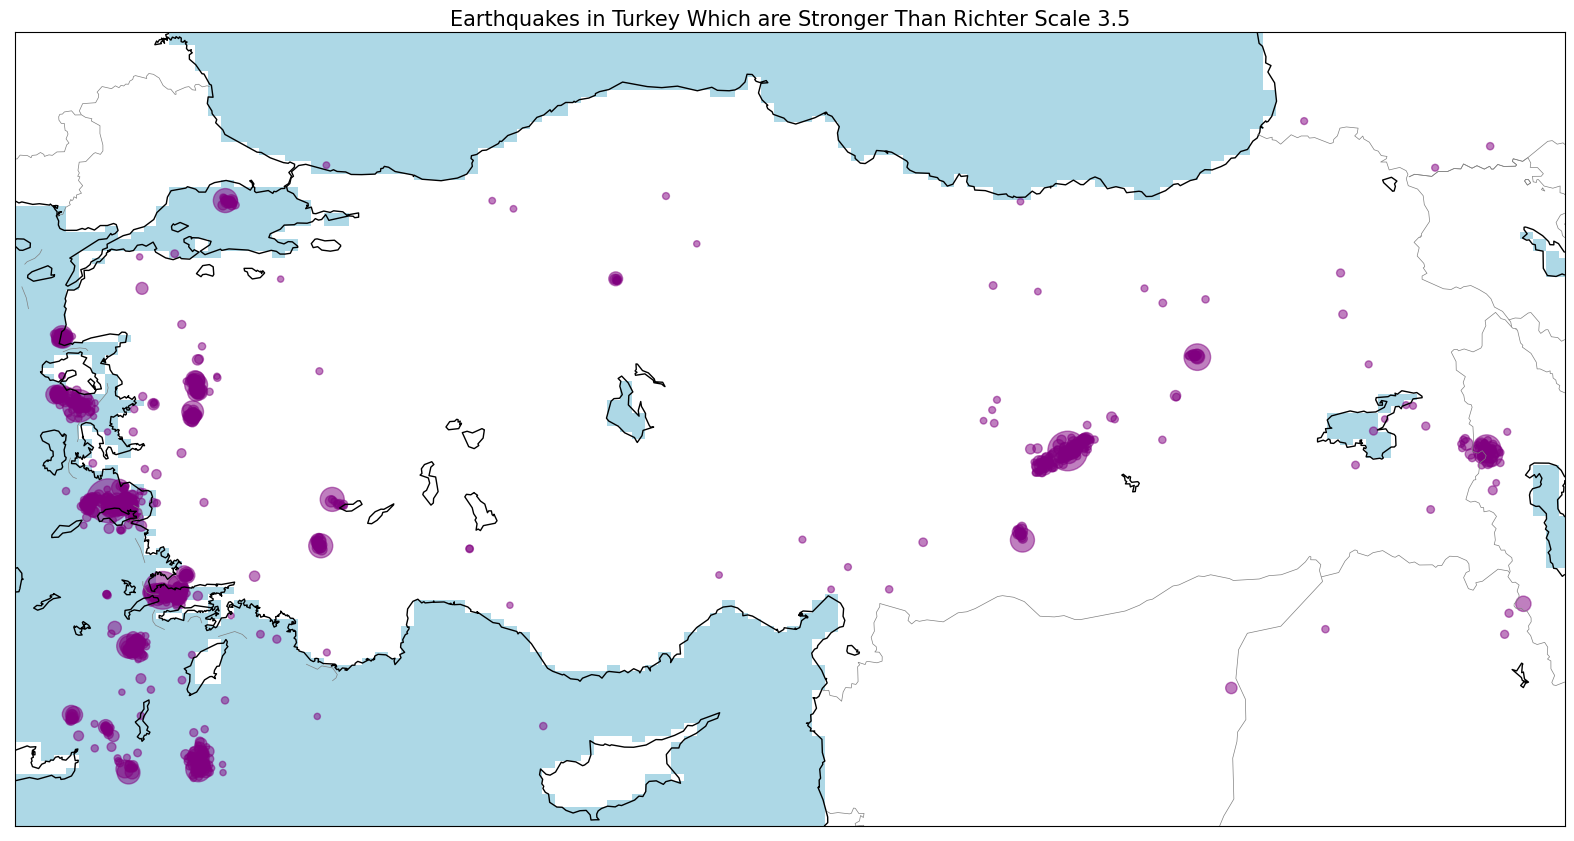

In [14]:
plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=34.5,
           urcrnrlat=42.5,
           llcrnrlon=25.5,
           urcrnrlon=45.5,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawlsmask(land_color='white', ocean_color='lightblue')

xs,ys = m(dup_locs['Longtitude'], dup_locs['Latitude'])
ss = np.exp(dup_locs['xM'])
m.scatter(xs, ys, c='purple', s=ss, alpha=0.5)

plt.title("Earthquakes in Turkey Which are Stronger Than Richter Scale 3.5", fontdict={"fontsize": 15}, pad=5);

We will filter data more specific for understanding the relation with human eyes.

As you can see, There is specific center with bigger radius, which means also the magnitude is really big at this location, when the days have more than 15 earthquakes. After this scatter, it is possible to say that especially big eartquakes triggers other ones.

In [15]:
def region_find(data):
    marmara = 'ISTANBUL|iSTANBUL|EDIRNE|EDiRNE|KIRKLARELI|KIRKLARELi|TEKIRDAG|TEKiRDAĞ|ÇANAKKALE|CANAKKALE|KOCAELI|KOCAELi|YALOVA|SAKARYA|BILECIK|BiLECiK|BURSA|BALIKESIR|BALIKESiR|MARMARA|BULGARISTAN'
    aegean = 'IZMIR|iZMiR|MANISA|MANiSA|AYDIN|DENIZLI|DENiZLi|MUGLA|MUĞLA|AFYONKARAHISAR|AFYONKARAHiSAR|USAK|UŞAK|KUTAHYA|KÜTAHYA|EGE'
    central_anatolia = 'ESKISEHIR|ESKiSEHiR|KONYA|ANKARA|CANKIRI|ÇANKIRI|AKSARAY|KIRIKKALE|KIRSEHIR|KIRSEHiR|YOZGAT|NIGDE|NiGDE|NEVSEHIR|NEVSEHiR|KAYSERI|KAYSERi|KARAMAN|SIVAS|SiVAS'
    mediterranean = 'ANTALYA|BURDUR|ISPARTA|MERSIN|MERSiN|ADANA|HATAY|OSMANIYE|OSMANiYE|KAHRAMANMARAS|KAHRAMANMARAŞ|AKDENIZ|AKDENiZ|KIBRIS'
    black_sea = 'BOLU|DUZCE|DÜZCE|ZONGULDAK|KARABUK|KARABÜK|BARTIN|KASTAMONU|CORUM|ÇORUM|SINOP|SiNOP|SAMSUN|AMASYA|TOKAT|ORDU|GIRESUN|GiRESUN|GUMUSHANE|GÜMÜŞHANE|TRABZON|BAYBURT|RIZE|RiZE|ARTVIN|ARTViN|KARADENIZ|KARADENiZ|GURCISTAN|GÜRCiSTAN'
    eastern_anatolia = 'MALATYA|ERZINCAN|ERZiNCAN|ELAZIG|ELAZIĞ|TUNCELI|TUNCELi|BINGOL|BiNGOL|ERZURUM|MUS|MUŞ|BITLIS|BiTLiS|KARS|AGRI|AĞRI|ARDAHAN|VAN|IGDIR|IĞDIR|HAKKARI|HAKKARi|IRAN|ERMENISTAN|ARMENIA|AZERBAYCAN'
    southeastern_anatolia = 'GAZIANTEP|GAZiANTEP|KILIS|KiLiS|ADIYAMAN|SANLIURFA|ŞANLIURFA|DIYARBAKIR|DiYARBAKIR|MARDIN|MARDiN|BATMAN|SIIRT|SiiRT|SIRNAK|ŞIRNAK|IRAK|SURIYE'

    check_marmara = data['Location'].str.contains(marmara).values
    check_aegean = data['Location'].str.contains(aegean).values
    check_central_anatolia = data['Location'].str.contains(central_anatolia).values
    check_mediterranean = data['Location'].str.contains(mediterranean).values
    check_black_sea = data['Location'].str.contains(black_sea).values
    check_eastern_anatolia = data['Location'].str.contains(eastern_anatolia).values
    check_southeastern_anatolia = data['Location'].str.contains(southeastern_anatolia).values

    region=list()
    for mar,aeg,can,med,bla,easan,souan in zip(check_marmara,check_aegean,check_central_anatolia,check_mediterranean, check_black_sea, check_eastern_anatolia, check_southeastern_anatolia ):
        if mar==True:
            region.append("Marmara")
        elif (aeg==True): 
            region.append("Aegean")
        elif (can==True): 
            region.append("Central Anatolia")
        elif (med==True): 
            region.append("Mediterranean")
        elif (bla==True): 
            region.append("Black Sea")
        elif (easan==True): 
            region.append("Eastern Anatolia")
        elif (souan==True): 
            region.append("Southeastern Anatolia")
        else:
            region.append("Unknown")
    return region

Earthquakes were filtered by regions. We get the names of the cities from the Internet according to the regions. We just added the names of the countries where Turkey have borders.

In [16]:
region=region_find(earthquake)
earthquake["Region"] = region
earthquake[(earthquake['Region'])=='Unknown']

,ID,Code,Date,Time,Latitude,Longtitude,Depth(KM),xM,MD,ML,Mw,Ms,Mb,Type,Location,Region


Then we have checked that is there any earthquake that could not classified according to region.

In [17]:
import geocoder
earthquake.iloc[0:5,:].apply(lambda row : geocoder.osm([row['Latitude'], row['Longtitude']], method='reverse'), axis=1)

0    [[Aşut, Erzincan, Doğu Anadolu Bölgesi, Türkiye]]
1       [[Ayanlar, Antalya, Akdeniz Bölgesi, Türkiye]]
2       [[Yeşilova, Ula, Ege Bölgesi, 48640, Türkiye]]
3    [[İsmet Paşa Mah., Şırnak Merkez, Şırnak, Güne...
4    [[Sivrice, Elâzığ, Doğu Anadolu Bölgesi, Türki...
dtype: object

We tried to use libraries that can detect location via coordinates uch as Geocoder, Geopy etc. However, it took a long time to compile because they were looking for coordinates on the internet. For this reason, region names were determined by filtering according to city names.

In [20]:
def year_sep(data):
    date_sep=data['Date'].str.split('.',expand=True)
    date_sep.columns=['Year','Month','Day']
    data.insert(loc=0, column='Month', value=date_sep['Month'])
    data.insert(loc=0, column='Year', value=date_sep['Year'])
    return data

In [21]:
earthquake=year_sep(earthquake)

This function creates year and month columns besides the date column which was already here. The reason of we are doing this is we want to analyze earthquakes numbers by two different types; yearly and regionally.

In [53]:
def piechart(data,year,ex=None):
    piec=earthquake[(earthquake['Year']==year)].groupby('Region').count()
    raw = Counter(piec)
    ks = piec.index.values.tolist()
    vs = piec.iloc[:,1]
    #vs = 100*np.array(list(raw.values()))/sum(raw.values())
    fig1, ax1 = plt.subplots()
    plt.pie(vs, labels=ks, explode=ex, autopct='%1.0f%%')
    ax1.set_title("Earthquake Distribution in %s"%year);
    plt.show()
    total=piec.iloc[:,1].sum()
    print(piec.iloc[:,1],'\nTotal Earthquakes in %s:'%year,total)

We did not want to filtering data by year over and over. So we embedded the function which takes the region name and year that you wanted to analyze and give you the data you wanted into this pie chart function. This function gets the required data from the unfiltered main data and plots it pie chart on its own. So, it is quite laborsaving.

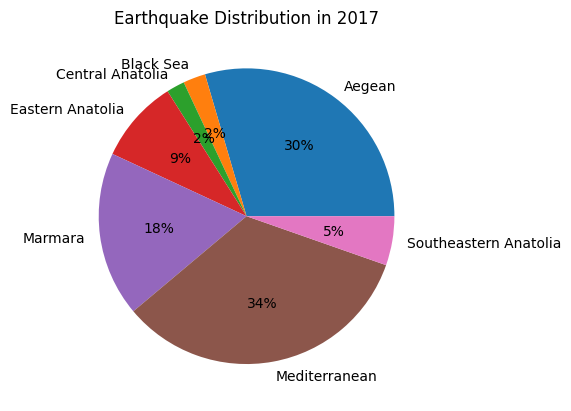

Region
Aegean                   506
Black Sea                 42
Central Anatolia          34
Eastern Anatolia         156
Marmara                  309
Mediterranean            574
Southeastern Anatolia     92
Name: Month, dtype: int64 
Total Earthquakes in 2017: 1713


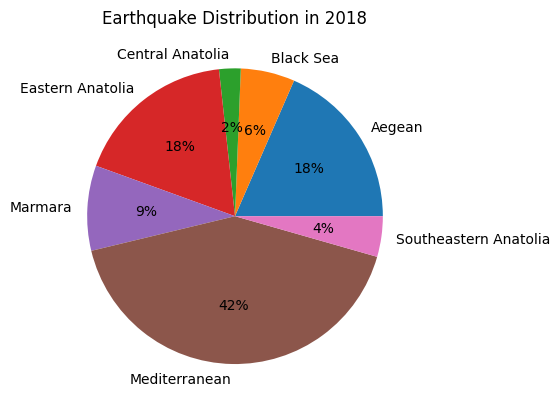

Region
Aegean                   125
Black Sea                 40
Central Anatolia          16
Eastern Anatolia         120
Marmara                   63
Mediterranean            283
Southeastern Anatolia     30
Name: Month, dtype: int64 
Total Earthquakes in 2018: 677


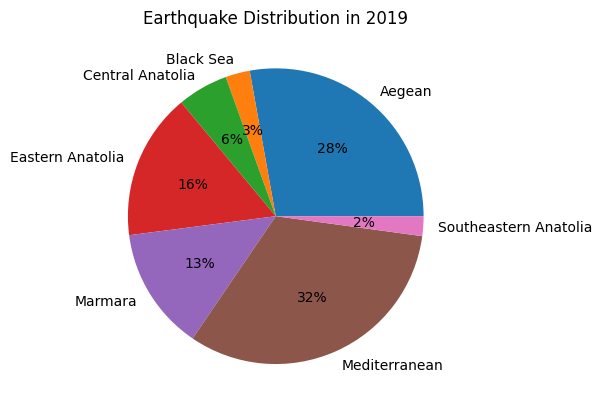

Region
Aegean                   271
Black Sea                 26
Central Anatolia          54
Eastern Anatolia         156
Marmara                  131
Mediterranean            315
Southeastern Anatolia     21
Name: Month, dtype: int64 
Total Earthquakes in 2019: 974


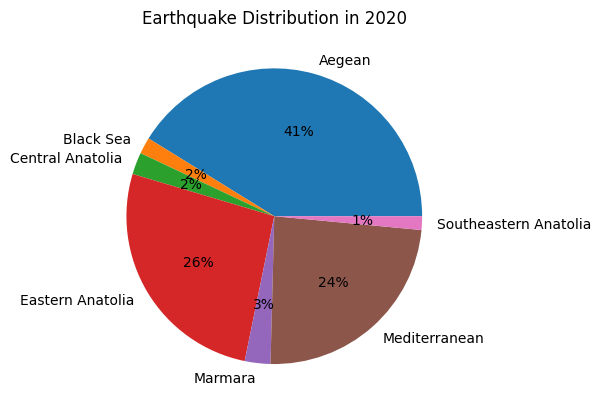

Region
Aegean                   911
Black Sea                 40
Central Anatolia          53
Eastern Anatolia         584
Marmara                   62
Mediterranean            529
Southeastern Anatolia     33
Name: Month, dtype: int64 
Total Earthquakes in 2020: 2212


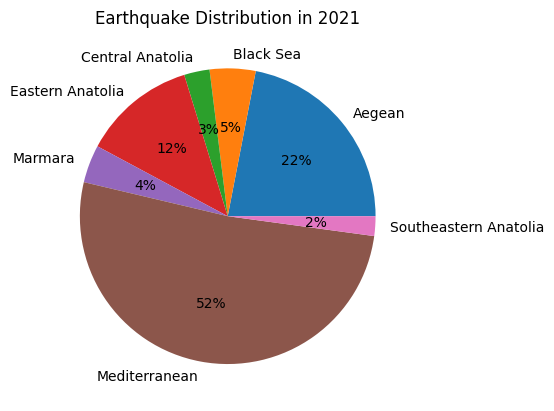

Region
Aegean                   276
Black Sea                 63
Central Anatolia          35
Eastern Anatolia         156
Marmara                   52
Mediterranean            648
Southeastern Anatolia     27
Name: Month, dtype: int64 
Total Earthquakes in 2021: 1257


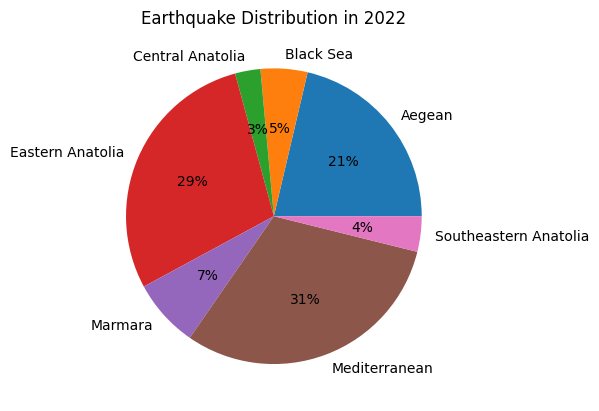

Region
Aegean                   154
Black Sea                 37
Central Anatolia          20
Eastern Anatolia         207
Marmara                   54
Mediterranean            222
Southeastern Anatolia     28
Name: Month, dtype: int64 
Total Earthquakes in 2022: 722


In [54]:
for i in range(6):
    year=str(i+2017)
    piechart(earthquake,year)

The pie charts above are showing the number of earthquakes that occurred between 2017 and 2022 by regions.

#### 2017
As can be seen from the pie chart for 2017, the total number of earthquakes in the Mediterranean region is higher than the number of earthquakes that occurred in other regions, and when evaluated as a percentage, it covers 34%. The total number of earthquakes in the Central Anatolia and Black Sea Regions, which are also among the earthquakes that occurred regionally, is the least.

#### 2018
The pie chart for 2018, the total number of earthquakes in the Mediterranean decreased numerically, but increased in percentage compared to 2017. In addition, there has been a significant decrease in the number of earthquakes that have occurred in the Marmara and Aegean regions. The other region where an increase in percentage was observed is the Eastern Anatolia Region, but there was a numerical decrease.

#### 2019
For 2019, a decrease as percentage was observed in the total number of earthquakes in the Mediterranean compared to 2018. In the Aegean Region, opposite of Mediterranean, there has been a significant increase in the number of total earthquakes, both in percentage and in numbers, compared to 2018.

#### 2020
The year with the highest number of earthquakes occurred between 2017 and 2022 is 2020. If we examine the regional-based pie chart, it has been observed that the total number of earthquakes occurring in the Aegean and Eastern Anatolia Regions has increased significantly both numerically and in percentage. In the Mediterranean Region, on the other hand, while there was a decrease in percentage, there was an increase in numbers.

#### 2021
Looking closer the pie chart of 2021; While there was a large percentage increase in the Mediterranean Region, there was no significant increase in the numbers, although a large percentage increase was observed as there was a decrease in the total number of earthquakes in Turkey. There has been a percentage and numerical decrease in Eastern Anatolia and Aegean Regions.

#### 2022
Examining the earthquakes that occurred in 2022, first of all, the percentage increase in the total number of earthquakes in Eastern Andolu is remarkable. On the other hand, if we examine the changes in the Mediterranean Region, there has been a significant decrease in percentage and number.


In [45]:
def dup_count(data,dates):
    date=dates['Date']
    for day in date:
        h=data[['Date','Duplicates']].where(earthquake['Date']==day)
        h=h.dropna(axis=0,how="all")
        h=h.reset_index()
        ind=h['index'].astype(float)

        k=dates.where(dates['Date']==day)
        k=k.dropna(axis=0,how="all")
        k.iloc[0,1]
        
        for j in ind:
            data.loc[j,'Duplicates'] = k.iloc[0,1]
            
    return earthquake

We have wrote a function that counts duplicates which means happened in the same day. But there was a problem which is it was reducing the data according to date and we were loosing our regions when counting duplicates. So this function gets duplicate numbers of dates from where we calculated it.
So this function takes the duplicate number of the specific day and copies it to main data where it finds this specific date.

In [43]:
earthquake['Duplicates']=[None]*len(earthquake)
dates=earthquake.groupby('Date').count()
dates=dates.reset_index()
dates=dates.iloc[:,0:2]
dates.columns=['Date','Duplicates']

In [46]:
earthquake=dup_count(earthquake,dates)
earthquake['Duplicates']=earthquake['Duplicates'].astype(float)

In [47]:
def region_filter(earthquake,reg):
    for i in reg:
        data=earthquake[(earthquake['Region']==i)].groupby('Date')['Duplicates'].count()
        plt.figure(figsize=(15,6))
        plt.plot(data)
        plt.title("Daily Earthquake Numbers in %s Region Between January 2017 - December 2022"%i)
        plt.legend([i])

After we categorized the data at each year be regions, we also wanted to see on region basis for all years that we are analyzing.

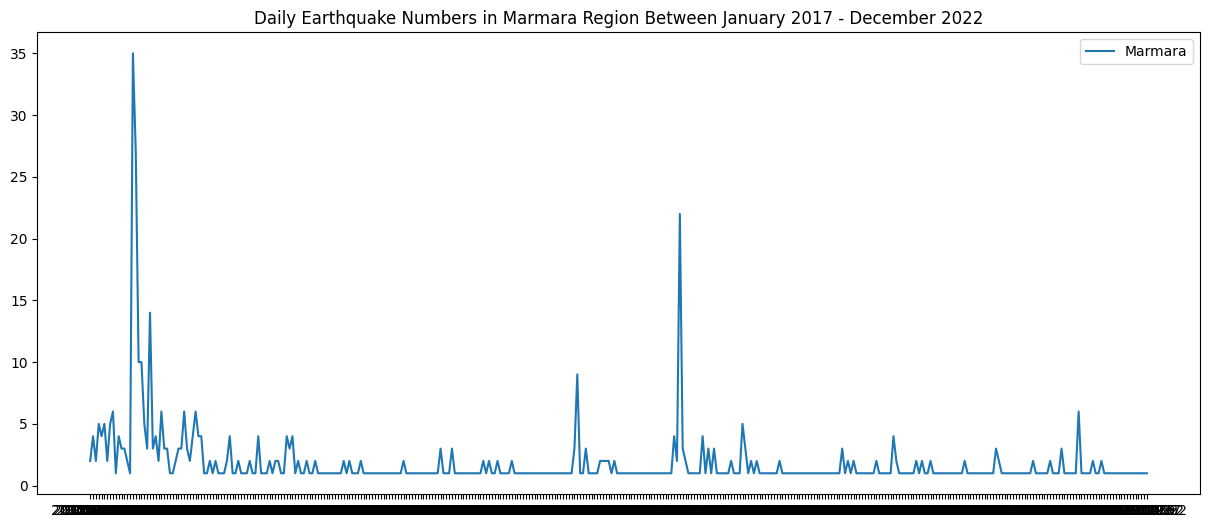

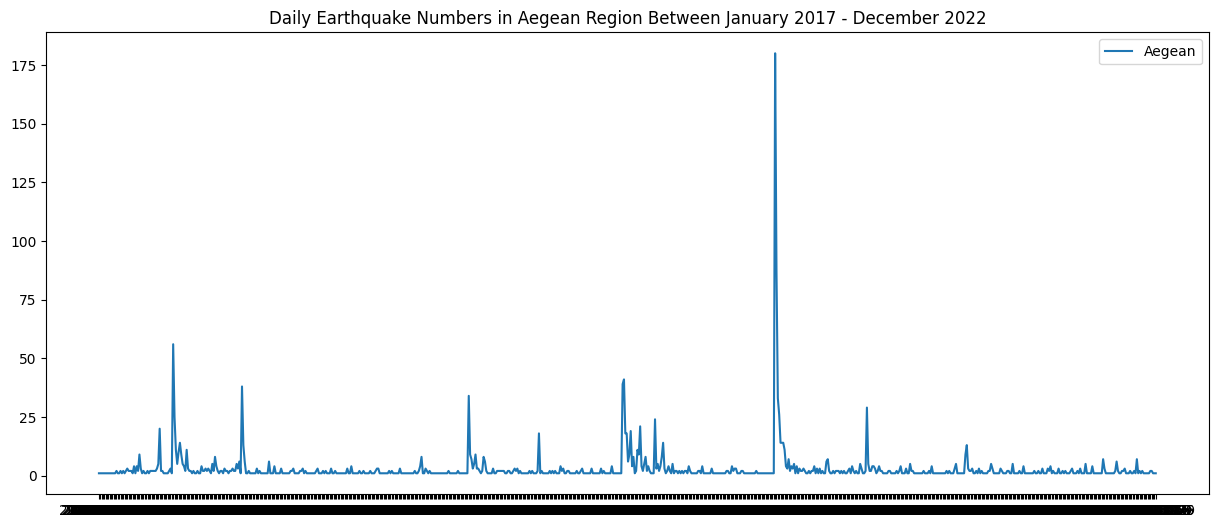

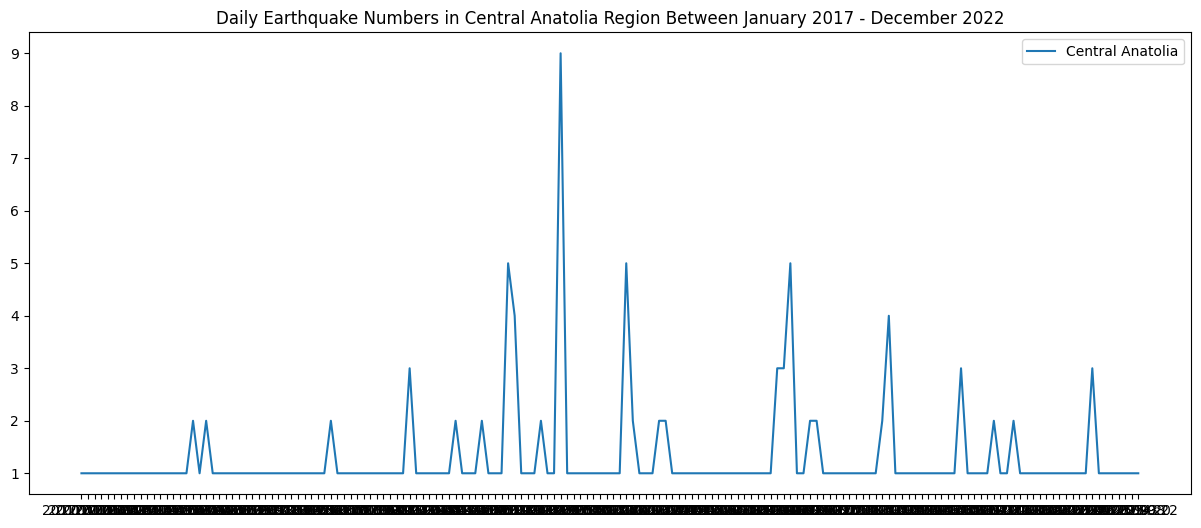

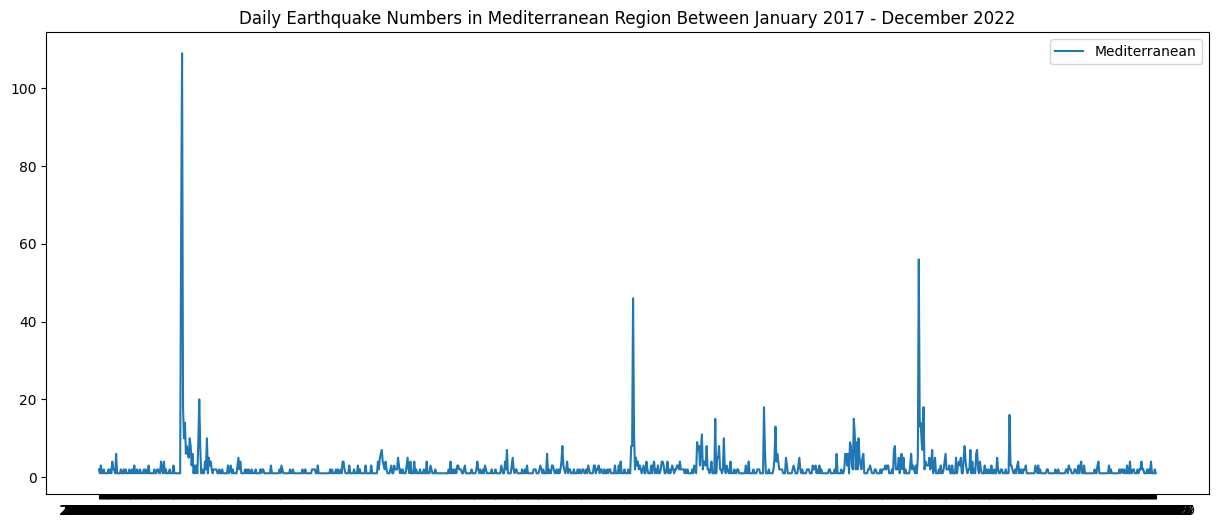

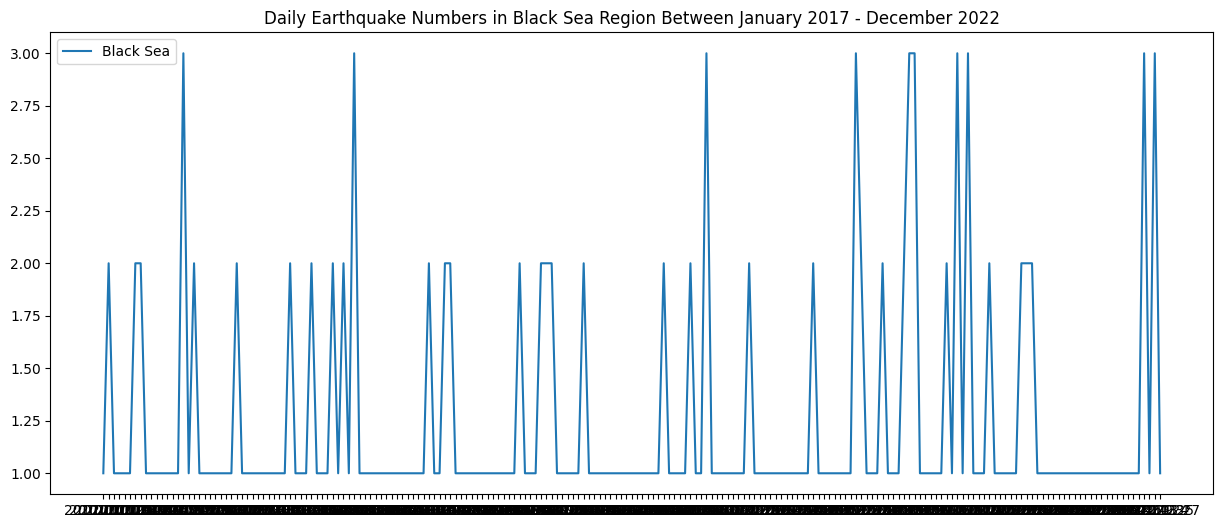

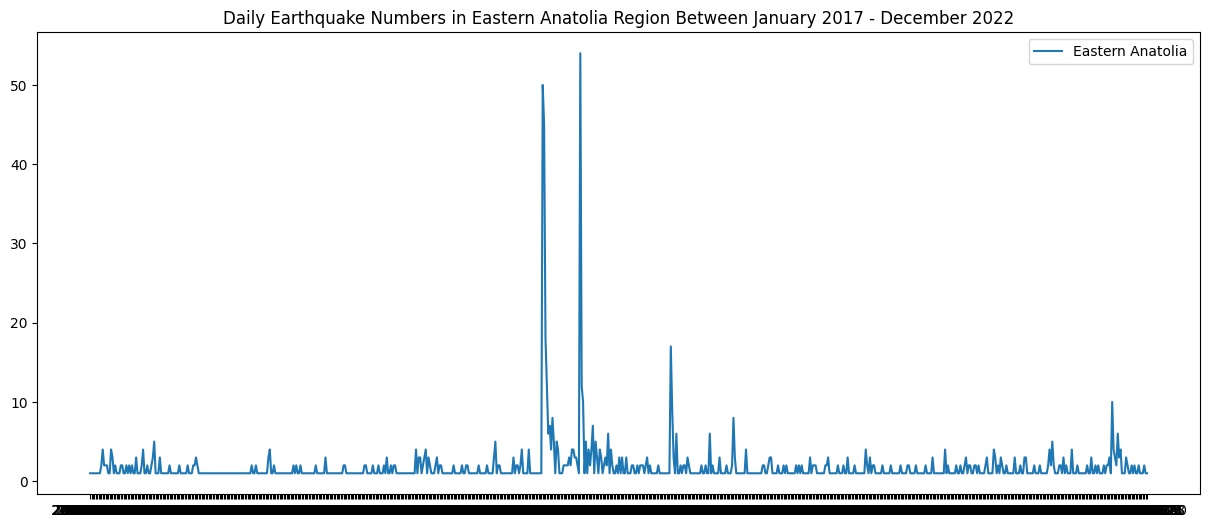

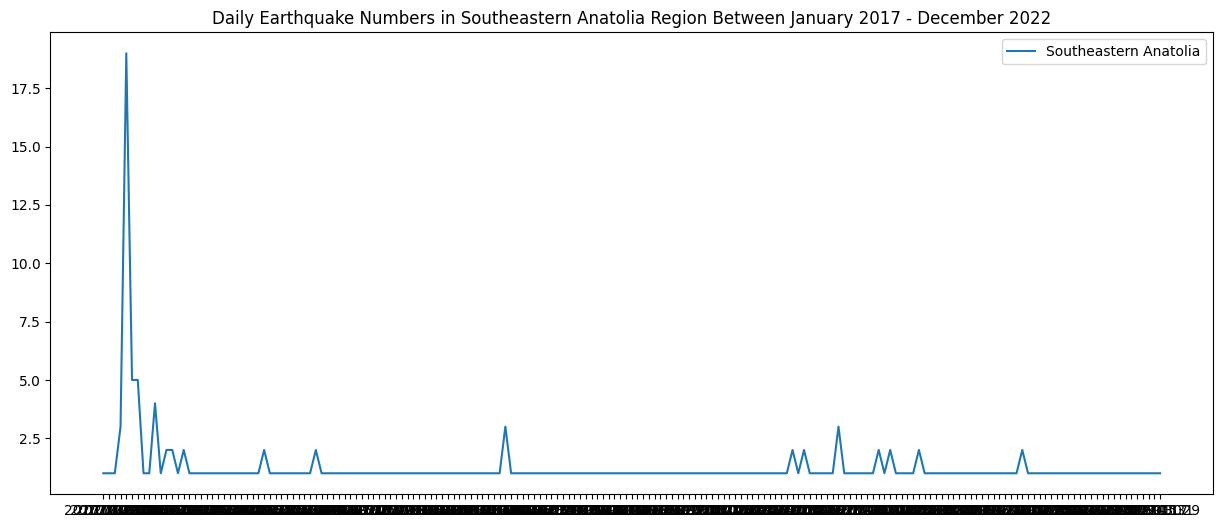

In [48]:
regs=("Marmara","Aegean","Central Anatolia","Mediterranean","Black Sea","Eastern Anatolia","Southeastern Anatolia")
region_filter(earthquake,regs)

According the density of graphs, which tells us earthquakes are happening more often in these regions, we may make a basic danger analysis. The most stabile graph is belong to Southeastern Anatolia region, we can accommodate this by its geographical location. 

![Turkey](./data/fay.jpeg)

If you cannot display the picture, you can see it from [here](https://www.artisiirt.com/i/dosya/haber/herkes-kontrol-etsin-evim-fay-_1669226082_bVXoNS.webp/webp-90-1280-720).

As you can see from the picture of Turkey fault line, it is covering whole Agean Region, most of the Marmara and Eastern Region, approaching to Mediterranean Region from two sides, standing closer to Black Sea Region but not covering the coast lines as in Agean Region.

We can verify this fault line according the regional graph. Density of the earthquake graphs are really intense in Mediterranen, Agean and Eastern regions. 